## Distribución de carga de tareas en almacenes con restricciones.

Alumno: José Jesús Enciso Mayo.

Búsqueda de soluciones e inferencia bayesiana.

Licenciatura en inteligencia artificial, 4to semestre.

## Introducción:

El problema de la distribución de tareas en almacenes se relaciona con problemas logísticos en la gestión de la cadena de suministro, en donde se busca asignar eficientemente tareas, trabajos o afines a diferentes almacenes, minimizando costos y evitando sobrecargas.

Esta cuestión surge en numerosos entornos industriales y comerciales, donde empresas de logística, distribución y almacenamiento deben decidir cómo asignar sus mercancías.

Una mala asignación puede generar ineficiencias, sobrecostos y retrasos, impactando la rentabilidad y el servicio al cliente.

Este problema es relevante porque implica la exploración de algoritmos de optimización heurística, como el recocido simulado, para encontrar soluciones eficientes en problemas de gran escala.

De igual forma, una distribución óptima de carga puede reducir costos de operación, optimizar el uso de recursos y mejorar la productividad de los almacenes.

Para este proyecto se buscó desarrollar un modelo donde cada tarea tiene una carga y una prioridad, cada almacén tiene una capacidad máxima, y existen restricciones sobre qué tareas pueden ser asignadas a qué almacenes (intentando así, hacerlo lo más cercano posible a una situación en el mundo real).

Utilizando el algoritmo de recocido simulado con dichas restricciones, el objetivo es minimizar el costo total del sistema, equilibrando la carga entre almacenes y penalizando asignaciones ineficientes.

## 1) Se importan las librerías que se usarán a lo largo del proyecto:

In [ ]:
import random
import math

## 2) Se define una función, "pedir_numeros_enteros":

El propósito de esta función será llamarla (más adelante) para indicarle al usuario que ingrese los datos solicitados (no. de almacenes, no. de tareas), dejándolo a su elección.

In [ ]:
def pedir_numeros_enteros(mensaje, minimo=1):
    # Hasta que el usuario ingrese un número correcto:
    while True:
        try:
            # Se le imprimirá un mensaje, pidiendo que ingrese un número.
            # Luego, se convertirá a un número entero.
            numero_entero = int(input(mensaje))

            # Si el número es menor que el parámetro "mínimo"...
            if numero_entero < minimo:
                print(f"Por favor, ingrese un número mayor o igual a {minimo}.") # Aviso al usuario.
            else:
                # Sino, lo regresa.
                return numero_entero

        # Si el usuario escribió algo que no se puede convertir a número:
        except ValueError: # Manejo de excepciones.
            print("Eso no es un número válido. Intente de nuevo.") # Se le pedirá al usuario un número válido.

## 3) Se define una función, "pedir_lista_numeros_enteros":

Similar al anterior, el propósito de esta función será llamarla (más adelante) para indicarle al usuario que ingrese los datos solicitados, en forma de lista (capacidad de cada almacen, no. de carga por tarea, no. de prioridad por tarea), dejándolo a su elección.

In [ ]:
def pedir_lista_numeros_enteros(mensaje, cantidad_numeros_pedida):
    # Hasta que el usuario ingrese una lista válida:
    while True:
        try:
            # Se pide al usuario que ingrese los números, separados por comas:
            numeros_introducidos_usuario = input(mensaje)

            # Se separa donde haya comas y se convierte cada elemento en un número entero:
            # Ejemplo: Ingresar "3,5,9" ó "3, 5, 9" se convierte en [3, 5, 9]
            lista_numeros_enteros = list(map(int, numeros_introducidos_usuario.split(",")))

            # Se revisa si se ingresó la cantidad de números solicitada:
            if len(lista_numeros_enteros) != cantidad_numeros_pedida:
                # Si se escribió más o menos números:
                print(f"Ingrese exactamente {cantidad_numeros_pedida} números.")
            else:
                # Si la cantidad es correcta, se regresa la lista de números:
                return lista_numeros_enteros

        except ValueError: # Manejo de excepciones
            print("Asegúrese de escribir solo números separados por comas.")

## 4) Generación y asignación de restricciones a las tareas:

**4.1)** Se inicializa "tabla_visual_restricciones" como una lista vacía, ahí se guardarán las restricciones.

**4.2)** Se declara un "for", para iterar sobre cada tarea y asignarle restricciones a cada una.

**4.3)** Se elige al azar cuántos almacenes serán permitidos para cada tarea.
Con "random.randint(min_opciones, numero_de_almacenes)" se selecciona un número aleatorio entre "min_opciones" y "numero_de_almacenes", esto para determinar el número de almacenes válidos para la tarea.

Luego, se eligen dichos almacenes de forma aleatoria con "random.sample(range(numero_de_almacenes), cantidad)", seleccionando una cantidad de almacenes al azar de la lista: [0, 1, ..., numero_de_almacenes - 1]

Ejemplo: Si hay 5 almacenes ([0, 1, 2, 3, 4]) y random.randint(2, 5) elige 3,
entonces opciones_de_almacenes podría ser [1, 3, 4] (almacenes permitidos para la tarea).

**4.4)** Se define una lista booleana para indicar qué almacenes son válidos para cada tarea.

Para cada almacén "j": Si "j" está en "opciones_de_almacenes", se guarda True (Permitido), sino False (Prohibido).

Ejemplo: Si opciones_de_almacenes = [1, 3, 4], entonces: restriccion = [False, True, False, True, True]

**4.5)** Se guarda la lista "restriccion" en "tabla_visual_restricciones". Al final debe regresar una matriz de restricciones.

In [ ]:
# 4.1) Definición de la función y la lista de restricciones:
# Se define una función, "generar_restricciones".
# Indica a qué almacenes puede ir cada tarea, y no todas las tareas pueden ir a todos los almacenes.
# Parámetros: min_opciones: Es el número mínimo de almacenes que cada tarea puede elegir.
def generar_restricciones(numero_de_tareas, numero_de_almacenes, min_opciones=2):
    # Se define una lista vacía, "tabla_visual_restricciones".
    # Se llenará con una lista para cada tarea (indica a qué almacenes podría ir):
    tabla_visual_restricciones = []

    # 4.2) Generar restricciones para cada tarea:
    # Iterará sobre cada tarea para asignarle restricciones:
    for _ in range(numero_de_tareas):

        # 4.3) Seleccionar aleatoriamente almacenes permitidos:
        # Se elige al azar un grupo de almacenes permitidos para la tarea actual.
        # range(numero_de_almacenes): Define una lista con todos los almacenes disponibles. Ejemplo: [0, 1, 2, 3, 4] (si hay 5 almacenes).
        # random.randint(min_opciones, numero_de_almacenes): Se elige el número aleatorio de almacenes permitidos.
        # random.sample(...): Se selecciona al azar esa cantidad de almacenes de la lista.
        # Resultado: "opciones_de_almacenes" será una lista como "[1, 3]" o "[0, 2, 4]".
        opciones_de_almacenes = random.sample(range(numero_de_almacenes), random.randint(min_opciones, numero_de_almacenes))

        # 4.4) Crear una lista de restricciones para la tarea:
        # Se define una lista booleana por cada almacén:
        # Recorre todos los almacenes ("j" va de 0 hasta el número de almacenes).
        # Si el almacén "j" está en las opciones permitidas para la tarea, será "True". Sino, "False".
        # Ejemplo: Hay 5 almacenes y las opciones son [1, 3], la lista sería: [False, True, False, True, False]
        restriccion = [j in opciones_de_almacenes for j in range(numero_de_almacenes)]

        # 4.5) Agregar la restricción de la tarea a la "tabla":
        # Se añade la lista que indica de a dónde puede ir la tarea a la lista general "restricciones".
        # Después de todas las iteraciones del ciclo, se tendrá una lista de listas.
        # Cada sublista dice qué almacenes son válidos para cada tarea.
        tabla_visual_restricciones.append(restriccion)
    # Se regresa todas las restricciones generadas, lista por lista:
    return tabla_visual_restricciones

## 5) Cálculo del costo de la solución:

**5.1)** Se ordenan los datos necesarios (No. de almacenes, capacidad por almacen, no. de tareas, carga de cada tarea, prioridad de cada tarea).

**5.2)** Se obtienen los resultados de las sumas de las cargas y prioridades (actuales) por cada almacen.

**5.3)** Penalización por sobrecarga:

Se inicializa "sobrecarga_almacen" en 0.

Después, se revisa si hay almacenes que hayan excedido su capacidad, mediante:
"exceso = max(0, carga_por_almacen[i] - capacidad_por_almacen[i])", para cada almácen. Una vez hecha la resta, se elegirá al número mayor.

Luego, se suma y guarda por cada almácen su sobrecarga, mediante: "sobrecarga_almacen += exceso * prioridad_por_almacen[i]".

Finalmente, se aplica: penalizacion_sobrecarga = alpha * sobrecarga_almacen

**5.4)** Penalización por desbalance de carga (varianza):

Primero, se calcula la media de las sumas de las cargas de las tareas de cada almacen.

Luego, se calcula la varianza de eso mismo.

Para después: penalizacion_desbalance = beta * varianza

**5.5)** Obtenemos el costo total de la solución actual:
costo_total = penalizacion_sobrecarga + penalizacion_desbalance

Mientras más elevado sea el valor de esto, quiere decir que hay más desbalance en la distribución de las tareas en los almacenes.

Empezará arrojando costos altos, y convergerá a medida que se encuentre la solución óptima, devolviendo así, el menor costo total posible.

In [ ]:
# Función de costo con restricciones, prioridades, balanceo y penalización por sobrecarga:

# Se define una función, "calcular_costo_con_restricciones":
# Toma un estado (forma de repartir tareas entre almacenes) y calcula qué tan buena o mala es, usando "costo".
# Un costo bajo es mejor. Si la solución es inválida, regresa un número enorme.

# Parámetros:
# almacen_asignado: A qué almacén se asignó cada tarea (una lista).
# tabla_visual_restricciones: Qué tareas pueden ir a qué almacenes.
# "alpha" y "beta": Son pesos (números que dicen cuánto importa una cosa u otra).
# penalizacion_invalida: 1e9 = mil millones, se devuelve cuando una solución rompe las reglas.
def calcular_costo_con_restricciones(almacen_asignado, carga_por_tarea, capacidad_por_almacen, prioridad_por_tarea, tabla_visual_restricciones, alpha=10, beta=1, penalizacion_invalida=1e9):

    # 5.1)
    # Se guarda cuántos almacenes hay:
    numero_de_almacenes = len(capacidad_por_almacen)

    # Estas dos listas empiezan con ceros:
    # Calculará el total de carga de tareas que hay en cada almacén.
    carga_por_almacen = [0] * numero_de_almacenes
    # Calculará el total de las prioridades de las tareas que van a cada almacén:
    prioridad_por_almacen = [0] * numero_de_almacenes
    # Para que las tareas más importantes generen más penalización, si hay errores.

    # 5.2)
    # Iterará sobre cada tarea (por su índice) y el almacén al que fue asignada:
    for indice_tarea, almacen in enumerate(almacen_asignado):
        # Verifica si la tarea fue enviada a un almacén prohibido.
        # Si la tarea no puede ir a ese almacén
        if not tabla_visual_restricciones[indice_tarea][almacen]:
            # se cancela todo y regresa la penalización de mil millones como costo, junto con None:
            return penalizacion_invalida, None  # solución inválida

        # Si la tarea sí está bien asignada:
        # Se suma su carga al almacén correspondiente.
        carga_por_almacen[almacen] += carga_por_tarea[indice_tarea]
        # Se suma su prioridad también a ese almacén correspondiente.
        prioridad_por_almacen[almacen] += prioridad_por_tarea[indice_tarea]

    # 5.3)
    # Empieza el cálculo de la sobrecarga (cuánto se pasó un almacén de su capacidad):
    sobrecarga_almacen = 0
    # Iterará sobre cada almacén:
    for i in range(numero_de_almacenes):
        # Si la carga total del almacén es mayor que su capacidad, se calcula el exceso:
        exceso = max(0, carga_por_almacen[i] - capacidad_por_almacen[i])
        # Ese exceso se multiplica por la prioridad total del almacén:
        sobrecarga_almacen += exceso * prioridad_por_almacen[i]
    # Así, si el exceso es grande y hay tareas importantes ahí, la penalización será más fuerte.

    # Se calcula cuánto "cuesta" la sobrecarga, multiplicándola por alpha.
    # alpha es un peso que dice cuánto queremos evitar pasarnos de capacidad.
    penalizacion_sobrecarga = alpha * sobrecarga_almacen

    # 5.4)
    # Para calcular el promedio de carga entre todos los almacenes:
    promedio_carga_almacenes = sum(carga_por_almacen) / numero_de_almacenes
    # Para calcular qué tan desbalanceada está la carga entre los almacenes:
    # Si todos tienen cargas parecidas, la varianza será baja.
    # Si unos están muy llenos y otros casi vacíos, será alta.
    varianza = sum((c - promedio_carga_almacenes)**2 for c in carga_por_almacen) / numero_de_almacenes
    # Calcula la penalización por desbalance:
    # beta dice qué tanto importa ese desbalance.
    penalizacion_desbalance = beta * varianza

    # 5.5)
    # Se suma las dos penalizaciones para obtener el costo total de la solución:
    costo_total_solucion = penalizacion_sobrecarga + penalizacion_desbalance
    # Retorna el costo total (qué tan buena o mala es la solución)
    # y la lista de cargas por almacén (para ver cómo quedaron repartidas las tareas):
    return costo_total_solucion, carga_por_almacen

## 6) Implementación del recocido simulado:

**6.1)** El objetivo es asignar cada tarea a un almacén válido según "tabla_visual_restricciones".

Para cada tarea:

Se obtiene la lista de almacenes donde puede estar (tabla_visual_restricciones[i]).

Se elige un almacén permitido de forma aleatoria con random.choice(...).

Ejemplo: Si hay 3 almacenes y la tabla_visual_restricciones de la tarea 0 es [False, True, True], significa que la tarea solo puede ir a los almacenes 1 o 2, y se elige uno de estos al azar.

**6.2)** Se calcula "solucion_actual" usando "calcular_costo_con_restricciones(...)".

Luego:

"costo_actual" almacena ese valor.

"mejor_solucion" se inicializa con "solucion_actual".

"mejor_costo" se inicia con "costo_actual".

"historial_costos" guarda la evolución de costos, comenzando con costo_actual.

**6.3)** Se inicia el "while" donde la temperatura se reduce progresivamente.

**6.4)** El "for" repetirá varias iteraciones por temperatura, para buscar mejores soluciones, permitiendo probar múltiples modificaciones antes de bajar la temperatura.

**6.5)** Se elige una tarea al azar.

Se revisan los almacenes válidos diferentes al actual, y se elige al azar uno de estos.

Si no hay almacenes válidoss, se salta a la siguiente iteración sin cambios.

**6.6)** Si hay almacenes válidos, se asigna la tarea a uno de estos, al azar.

Se calcula el nuevo costo.

Se obtiene la diferencia de costos.

Interpretación de delta:
Si delta < 0, significa que la nueva solución es mejor; sino, entonces la nueva solución es peor.

**6.7)** Si la nueva solución es mejor, se acepta; pero, si es peor, se acepta a veces con una probabilidad que depende de la temperatura:

Si la temperatura es alta, "math.exp(-delta / temperatura)" es grande, permite aceptar soluciones malas y evitar quedarse atrapado en mínimos locales; y si la temperatura es baja, esta probabilidad disminuye.

Si se acepta, la nueva solución reemplaza la actual.

**6.8)** Cada iteración baja la temperatura multiplicándola por alfa.

Ejemplo: Si temperatura = 1000, tras una iteración se vuelve 950, luego 902.5, y así...

Cuando "temperatura < temperatura_final", el "while" termina, y el algoritmo regresa la solución óptima, su costo final.

In [ ]:
# Se define una función, "recocido_simulado_restringido".
# Encuentra una buena forma de repartir tareas en almacenes (solución óptima), respetando las restricciones:

# Parámetros:
# temperatura_inicial: Temperatura inicial del algoritmo.
# temperatura_final: Temperatura final.
# alfa: Cuánto baja la temperatura en cada ronda.
# iteraciones_por_temperatura: No. de intentos que se hacen por cada nivel de temperatura.
def recocido_simulado_restringido(carga_por_tarea, capacidad_por_almacen, prioridad_por_tarea, tabla_visual_restricciones,
                                  temperatura_inicial=1000, temperatura_final=1, alfa=0.95, iteraciones_por_temperatura=100):
    # Para guardar cuántas tareas y cuántos almacenes hay:
    numero_de_tareas = len(carga_por_tarea)
    numero_de_almacenes = len(capacidad_por_almacen)

    # 6.1) Se genera una solución inicial válida:
    solucion_actual = [
        # Para cada tarea, se elige al azar un almacén que sí esté permitido (según sus restricciones):
        random.choice([j for j in range(numero_de_almacenes) if tabla_visual_restricciones[i][j]])
        for i in range(numero_de_tareas)
    ]

    # 6.2) Se evalua está solución inicial:
    # Se calcula cuánto cuesta esa primera solución (qué tan buena o mala es):
    costo_actual, _ = calcular_costo_con_restricciones(solucion_actual, carga_por_tarea, capacidad_por_almacen, prioridad_por_tarea, tabla_visual_restricciones)
    # Al ser la 1ra solución, se guarda como la mejor encontrada hasta ahora:
    mejor_solucion = solucion_actual[:]
    # Junto a su costo, como el mejor hasta ahora:
    mejor_costo = costo_actual
    # Se empieza a guardar el historial del costo en cada ronda:
    historial_costos = [costo_actual]

    # 6.3) Enfriamiento:
    # Se inicia la temperatura. Mientras esté "alta", el algoritmo se permite "equivocarse" un poco, para explorar nuevas soluciones:
    temperatura = temperatura_inicial

    # El "while" se repetirá hasta que la temperatura "baje" lo suficiente.
    # Simulando así el recocido, como si el sistema se fuese enfriando lentamente:
    while temperatura > temperatura_final:

        # 6.4) Exploración de nuevas soluciones:
        # El "for" hará varios intentos por cada temperatura.
        # Más intentos = más posibilidades de encontrar algo mejor:
        for _ in range(iteraciones_por_temperatura):
            # Se hace una copia de la solución actual para modificarla, sin perder la original:
            nueva_solucion = solucion_actual[:]

            # 6.5) Modificar la solución:
            # Se elige una tarea al azar, para intentar cambiarla de almacén:
            cambiar_tarea_de_almacen = random.randint(0, numero_de_tareas - 1)

            # Para considerar solo almacenes válidos distintos al actual:
            # Se buscarán almacenes válidos y diferentes al actual, en donde esa tarea podría ir, evitando que se quede igual:
            opciones_validas = [j for j in range(numero_de_almacenes) if tabla_visual_restricciones[cambiar_tarea_de_almacen][j] and j != solucion_actual[cambiar_tarea_de_almacen]]
            # En el caso de no haber...
            if not opciones_validas:
                continue  # No hay cambio válido para esta tarea, y salta a la sig.

            # 6.6) Se evalua la nueva solución:
            # Sí hay opciones, se elige una al azar y se asigna esa tarea a ese nuevo almacén:
            nueva_solucion[cambiar_tarea_de_almacen] = random.choice(opciones_validas)

            # Se calcula el nuevo costo de esta solución modificada:
            nuevo_costo, _ = calcular_costo_con_restricciones(nueva_solucion, carga_por_tarea, capacidad_por_almacen, prioridad_por_tarea, tabla_visual_restricciones)
            # Y la diferencia (delta) entre la nueva y la anterior:
            delta = nuevo_costo - costo_actual

            # 6.7) Aceptar o rechazar la nueva solución:
            # Se decide si se acepta el cambio o no:
            # Si el nuevo costo es menor (mejor), sí se acepta.
            # Si es peor, a veces también se acepta, dependiendo de la temperatura.
            if delta < 0 or random.uniform(0, 1) < math.exp(-delta / temperatura):
                # Se actualiza la solución actual si fue aceptada:
                solucion_actual = nueva_solucion
                costo_actual = nuevo_costo

                # Si esta nueva solución es la mejor de todas hasta ahora...
                if nuevo_costo < mejor_costo:
                    # Se guarda:
                    mejor_solucion = nueva_solucion
                    mejor_costo = nuevo_costo

        # Al final de esta ronda de temperatura, se guarda el costo actual en la lista del historial:
        historial_costos.append(costo_actual)

        # 6.8) Reducir la temperatura:
        # Se baja la temperatura, multiplicándola por alfa (Ejemplo: si alfa es 0.95, la temperatura bajará un 5%):
        temperatura *= alfa

    # Retorna:
    # La mejor forma encontrada de repartir las tareas.
    # Su costo (qué tan buena fue).
    # El historial de costos.
    return mejor_solucion, mejor_costo, historial_costos

## Ejemplos para probar el funcionamiento del código:

1)

¿Cuántos almacenes hay?: 5

Ingrese la capacidad de cada uno: 220, 298, 101, 151, 191


¿Cuántas tareas deseas asignar?: 100

Ingrese la carga de cada tarea: 9, 7, 5, 5, 1, 4, 6, 1, 4, 9, 2, 5, 7, 2, 1, 10, 9, 8, 8, 3, 7, 5, 4, 6, 8, 1, 5, 9, 10, 1, 1, 9, 2, 6, 2, 6, 9, 7, 4, 2, 9, 2, 6, 10, 9, 2, 7, 7, 8, 9, 8, 4, 2, 6, 5, 9, 10, 1, 3, 6, 9, 10, 3, 4, 9, 3, 9, 6, 5, 10, 2, 4, 1, 3, 9, 5, 1, 8, 6, 2, 3, 10, 3, 3, 2, 5, 7, 8, 1, 2, 3, 1, 8, 6, 3, 5, 3, 10, 8, 6

Ingrese la prioridad de cada tarea: 3, 4, 5, 1, 5, 1, 5, 1, 3, 4, 1, 3, 1, 2, 2, 2, 2, 1, 5, 1, 1, 2, 1, 3, 5, 3, 5, 2, 5, 5, 2, 5, 1, 5, 1, 1, 3, 4, 4, 3, 4, 2, 3, 3, 1, 4, 3, 5, 1, 4, 5, 5, 2, 1, 2, 2, 1, 4, 3, 3, 4, 1, 5, 4, 1, 1, 5, 3, 1, 2, 2, 3, 5, 2, 5, 5, 1, 5, 2, 1, 1, 1, 5, 3, 3, 3, 2, 2, 3, 5, 1, 3, 2, 4, 3, 5, 3, 4, 2, 5


Costo total de la solución encontrada (lo que se espera): 11.76

2)

¿Cuántos almacenes hay?: 2

Ingrese la capacidad de cada uno: 74, 26


¿Cuántas tareas deseas asignar?: 10

Ingrese la carga de cada tarea: 1, 5, 2, 10, 3, 4, 9, 8, 10, 9

Ingrese la prioridad de cada tarea: 4, 2, 4, 5, 2, 2, 3, 2, 5, 2


Costo total de la solución encontrada (lo que se espera): 20.25

In [ ]:
#7:

# Para pedir los datos al usuario:
numero_de_almacenes = pedir_numeros_enteros("¿Cuántos almacenes hay?: ")
capacidad_por_almacen = pedir_lista_numeros_enteros(f"Ingrese la capacidad de cada uno de los {numero_de_almacenes} almacenes, separados por comas (Ej: 50,50,50): ", numero_de_almacenes)

numero_de_tareas = pedir_numeros_enteros("\n¿Cuántas tareas deseas asignar?: ")
carga_por_tarea = pedir_lista_numeros_enteros(f"Ingrese la carga de cada una de las {numero_de_tareas} tareas, separados por comas (Ej: 2,5,6,...): ", numero_de_tareas)
prioridad_por_tarea = pedir_lista_numeros_enteros(f"Ingrese la prioridad (1-5) de cada tarea, separados por comas (Ej: 1,3,4,...): ", numero_de_tareas)

# Llamada a la función, "generar_restricciones()", crea una tabla de qué almacenes pueden recibir qué tareas:
tabla_visual_restricciones = generar_restricciones(numero_de_tareas, numero_de_almacenes)

¿Cuántos almacenes hay?: 2
Ingrese la capacidad de cada uno de los 2 almacenes, separados por comas (Ej: 50,50,50): 50,60

¿Cuántas tareas deseas asignar?: 12
Ingrese la carga de cada una de las 12 tareas, separados por comas (Ej: 2,5,6,...): 5, 6, 8, 10, 15, 7, 8, 9, 8, 8, 5, 10
Ingrese la prioridad (1-5) de cada tarea, separados por comas (Ej: 1,3,4,...): 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2


## Resultados:

In [ ]:
#8:

# Llamada a la función, "recocido_simulado_restringido()", para encontrar la mejor solución:
# mejor_solucion: Mejor forma de repartir las tareas que se encontró.
# mejor_costo: Qué tan buena es esa solución (representación del costo).
# historial: Lista con la evolución de los costos, para ver cómo mejoró con el tiempo.
mejor_solucion, mejor_costo, historial = recocido_simulado_restringido(
    carga_por_tarea, capacidad_por_almacen, prioridad_por_tarea, tabla_visual_restricciones
)

# Llamada a la función, "calcular_costo_con_restricciones()", para las cargas finales de cada almacén:
# El "_" significa algo como "no me importa este valor", porque solo interesa "cargas_finales".
_, carga_final = calcular_costo_con_restricciones(mejor_solucion, carga_por_tarea, capacidad_por_almacen, prioridad_por_tarea, tabla_visual_restricciones)

print("\nCARGA FINAL POR ALMACÉN:")
for i, carga in enumerate(carga_final):
    print(f"  Almacén {i}: carga total = {carga} / capacidad = {capacidad_por_almacen[i]}")

print(f"\nCosto final de la mejor solución encontrada: {mejor_costo}")


CARGA FINAL POR ALMACÉN:
  Almacén 0: carga total = 49 / capacidad = 50
  Almacén 1: carga total = 50 / capacidad = 60

Costo final de la mejor solución encontrada: 0.25


In [ ]:
# Resumen general:

print("Capacidad de almacenes:", capacidad_por_almacen) # Para imprimir la capacidad de cada almacén.
print("Carga (peso) de cada tarea:", carga_por_tarea) # Para imprimir la carga (el peso) de cada tarea.
print("Prioridad de cada tarea:", prioridad_por_tarea) # Para imprimir la importancia de cada tarea.
print("Restricciones:", tabla_visual_restricciones) # Para imprimir una lista de cada tarea, en dónde se muestra en qué almacen pudo haber ido.
print("Mejor costo:", mejor_costo) # Para imprimir el costo de la solución encontrada.

Capacidad de almacenes: [50, 60]
Carga (peso) de cada tarea: [5, 6, 8, 10, 15, 7, 8, 9, 8, 8, 5, 10]
Prioridad de cada tarea: [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2]
Restricciones: [[True, True], [True, True], [True, True], [True, True], [True, True], [True, True], [True, True], [True, True], [True, True], [True, True], [True, True], [True, True]]
Mejor costo: 0.25


In [ ]:
# A partir de aquí, TODO para imprimir la información general útil:

print("ALMACENES (con sus respectivas capacidades):")
for i, cap in enumerate(capacidad_por_almacen):
    print(f"  Almacén {i}: {cap}")

ALMACENES (con sus respectivas capacidades):
  Almacén 0: 50
  Almacén 1: 60


In [ ]:
print("TAREAS (con su respectiva carga (peso) ):")
for i, peso in enumerate(carga_por_tarea):
    print(f"  Tarea {i}: {peso}")

TAREAS (con su respectiva carga (peso) ):
  Tarea 0: 5
  Tarea 1: 6
  Tarea 2: 8
  Tarea 3: 10
  Tarea 4: 15
  Tarea 5: 7
  Tarea 6: 8
  Tarea 7: 9
  Tarea 8: 8
  Tarea 9: 8
  Tarea 10: 5
  Tarea 11: 10


In [ ]:
print("TAREAS (con su respectiva prioridad):")
for i, prio in enumerate(prioridad_por_tarea):
    print(f"  Tarea {i}: prioridad {prio}")

TAREAS (con su respectiva prioridad):
  Tarea 0: prioridad 1
  Tarea 1: prioridad 2
  Tarea 2: prioridad 3
  Tarea 3: prioridad 4
  Tarea 4: prioridad 5
  Tarea 5: prioridad 1
  Tarea 6: prioridad 2
  Tarea 7: prioridad 3
  Tarea 8: prioridad 4
  Tarea 9: prioridad 5
  Tarea 10: prioridad 1
  Tarea 11: prioridad 2


In [ ]:
print("RESTRICCIONES (si una tarea puede ir a un almacén):")
for i, fila in enumerate(tabla_visual_restricciones):
    acceso = ["O" if ok else "X" for ok in fila]
    print(f"  Tarea {i}: {acceso}")

RESTRICCIONES (si una tarea puede ir a un almacén):
  Tarea 0: ['O', 'O']
  Tarea 1: ['O', 'O']
  Tarea 2: ['O', 'O']
  Tarea 3: ['O', 'O']
  Tarea 4: ['O', 'O']
  Tarea 5: ['O', 'O']
  Tarea 6: ['O', 'O']
  Tarea 7: ['O', 'O']
  Tarea 8: ['O', 'O']
  Tarea 9: ['O', 'O']
  Tarea 10: ['O', 'O']
  Tarea 11: ['O', 'O']


In [ ]:
print("MEJOR SOLUCIÓN encontrada (Asignación: tarea → almacén):")
for i, almacen in enumerate(mejor_solucion):
    print(f"  Tarea {i} → Almacén {almacen}")

MEJOR SOLUCIÓN encontrada (Asignación: tarea → almacén):
  Tarea 0 → Almacén 0
  Tarea 1 → Almacén 0
  Tarea 2 → Almacén 0
  Tarea 3 → Almacén 0
  Tarea 4 → Almacén 1
  Tarea 5 → Almacén 0
  Tarea 6 → Almacén 1
  Tarea 7 → Almacén 1
  Tarea 8 → Almacén 1
  Tarea 9 → Almacén 0
  Tarea 10 → Almacén 0
  Tarea 11 → Almacén 1


## Resultados (gráficamente):

In [ ]:
#import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

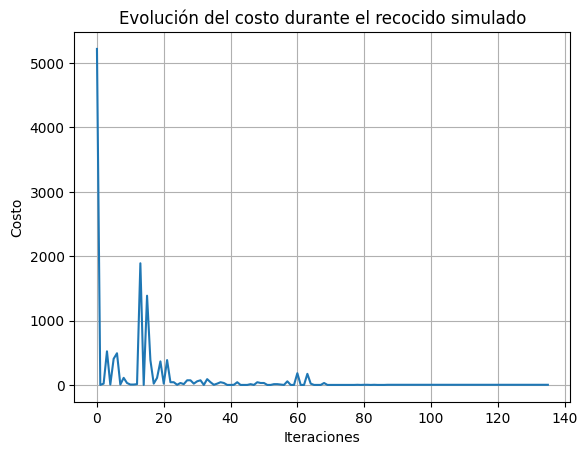

In [ ]:
# Evolución del costo durante el recocido simulado:
plt.plot(historial)
plt.title("Evolución del costo durante el recocido simulado")
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.grid(True)
plt.show()